In [1]:
# ** Citations **

#BIG CODE
# USED ALOT -> https://github.com/Larix/Logistic_Regression/blob/master/logistic_regression_sgd.py

#HONORABLE MENTIONS
# https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
# https://github.com/antonio-f/Programming-assignment-Linear-models-Optimization-/blob/master/Programming%20assignment%20(Linear%20models%2C%20Optimization)/week01_pa.ipynb
# https://ruder.io/optimizing-gradient-descent/

#SMOL EDITTED CODE
# https://github.com/sahil210695/gradient-descent/blob/master/gradient-descent.ipynb
# https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3
# https://github.com/bhattbhavesh91/gradient-descent-variants/blob/master/gradient-descent-variants-notebook.ipynb
# https://github.com/antonio-f/Programming-assignment-Linear-models-Optimization-/blob/master/Programming%20assignment%20(Linear%20models%2C%20Optimization)/week01_pa.ipynb

#EXPLAINATION
# https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
# https://towardsdatascience.com/how-do-artificial-neural-networks-learn-773e46399fc7

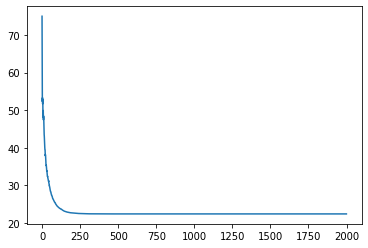

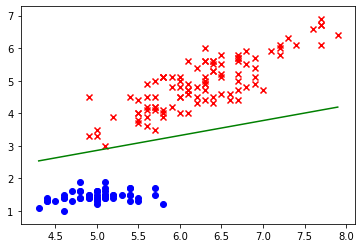

Accuracy:  100.0 %
Process ended in 5.1398 seconds


In [48]:
import matplotlib.pyplot as plt

import numpy as np
import math
import random
import time

# pre load sklearn iris datasets
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

X = iris.data  
Y = iris.target

dataset = []

target_label = 0 # pick one of the three iris types
for index, x in enumerate(X):
    transform_label = None
    if Y[index] == target_label:
        transform_label = 1 # is the type
    else:
        transform_label = 0 # is not the type
        
    x = [x[0], x[2]] # pick which two characteristics to train the algorithms
    dataset.append((x,transform_label))
    
dataset = np.array(dataset)

#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sgd(dataset, w):
    #run sgd randomly
    index = random.randint(0, len(dataset) - 1)
    
    x, y = dataset[index]
    x = np.array(x)
    
    error = sigmoid(w.T.dot(x))
    g = (error - y) * x
    return g


def bgd(dataset, w, i):
    #run bgd for the entire dataset
    totG = 0
    
    for i in range(len(dataset)):
        index = i%len(dataset)
        
        a = 33
    
        if(index < (len(dataset)-a)):
            index = index + a
        else:
            index = index%(len(dataset) - a)
    
        x, y = dataset[index]
        x = np.array(x)
        
        error = sigmoid(w.T.dot(x))
        g = (error - y) * x
        totG += g
        
    return (totG/len(dataset))


def cost(dataset, w):
    total_cost = 0
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x))
        total_cost += abs(y - error)
    return total_cost


def logistic_regressionS(dataset):
    w = np.zeros(2)
    limit = 2000 #update times
    eta = 0.1 #update rate
    costs = []
    
    for i in range(limit):
        current_cost = cost(dataset, w)
        
        '''
        if i % 100 == 0:
            print ("epoch = " + str(i/100 + 1) + ": current_cost = ", current_cost)
        '''
            
        costs.append(current_cost)
        
        w = w - eta * sgd(dataset, w)
        eta = eta * 0.98 #decrease update rate
    plt.plot(range(limit), costs)
    plt.show()
    return w,(limit, costs)


def logistic_regressionB(dataset):
    w = np.zeros(2)
    limit = 2000 #update times
    eta = 0.1 #update rate
    costs = []
    
    alpha = 0.1 # momentum
    nu = np.zeros_like(w)
    
    for i in range(limit):
        current_cost = cost(dataset, w)
        
        '''
        if i % 100 == 0:
            print ("epoch = " + str(i/100 + 1) + ": current_cost = ", current_cost)
        '''  
            
        costs.append(current_cost)
         
        #nu = eta * bgd(dataset, w, i) 
        nu = alpha * nu + eta * bgd(dataset, w, i) 
        w = w - nu  
        
        eta = eta * 0.98 #decrease update rate
        
    plt.plot(range(limit), costs)
    plt.show()
    return w,(limit, costs)


def logistic_regressionM(dataset):
    w = np.zeros(2)
    limit = 2000 #update times
    eta = 0.1 #update rate
    batch = 50
    costs = []
    
    #limit = int(limit/batch)
    
    for i in range(limit):        
        current_cost = cost(dataset, w)
        
        '''
        if i % int(100/batch) == 0:
            print ("epoch = " + str(i/(100/batch) + 1) + ": current_cost = ", current_cost)
                    # for j in range(0, len(dataset), batch):
        '''    
            
        np.random.shuffle(dataset)
        minidataset = dataset[0: batch-1]  
            
        w = w - eta * bgd(minidataset, w, i)
        eta = eta * 0.98 #decrease update rate
        
        costs.append(current_cost)
    
    plt.plot(range(limit), costs)
    plt.show()
    return w,(limit, costs)


def main():
    start = time.perf_counter()
    
    #execute
    w = logistic_regressionM(dataset)
    
    #draw 
    ps = [v[0] for v in dataset]
    label = [v[1] for v in dataset]
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    
    #plot via label
    tpx=[]
    for index, label_value in enumerate(label):
        px=ps[index][0]
        py=ps[index][1]
        tpx.append(px)
        if label_value == 1:
            ax1.scatter(px, py, c='b', marker="o", label='O')
        else:
            ax1.scatter(px, py, c='r', marker="x", label='X')

    l = np.linspace(min(tpx),max(tpx))
    a,b = (-w[0][0]/w[0][1], w[0][0])
    ax1.plot(l, a*l + b, 'g-')
    plt.show()

    limit = w[1][0]
    costs = w[1][1]
    w = w[0]

    # calculate score
    predicted_Y=[]
    answer_Y=[]
    for X,Y in dataset:
        answer_Y.append(Y)
        predicted_Y.append(sigmoid(w.T.dot(X)))
    predicted_Y = np.asarray(predicted_Y)
    predicted_Y = predicted_Y > 0.5
    #print(answer_Y)
    #print(predicted_Y)
    print ("Accuracy: ",str(accuracy_score(answer_Y, predicted_Y)*100)[:5],"%")
        
    end = time.perf_counter()
    print(f"Process ended in {end - start:0.4f} seconds")
   

if __name__ == '__main__':
    main()

ValueError: operands could not be broadcast together with shapes (19,20) (19,) 